<a href="https://colab.research.google.com/github/Tanishasharma11/Mini-Project-12-Tweets-Search-Download/blob/main/Tweet_Search_Download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Package**

In [1]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Add Credentials**

In [2]:
access_token = "501682241-ZG1DshytyxUIUY8FXPoH2AXaDG9d5DQlORemfAzU"
access_token_secret = "mxwCYkDjgWG5qWy8ONtVs3j2lxiYSxyberVVa92jmd27z"
consumer_key = "we0Drpnvc1FZNazKkiKoFWlGf"
consumer_secret = "OXRvmJwM6ca9k90XMIMoktSCa5XvjNieqJivcfjbOAlmpO6RhH"

In [3]:
import os
import tweepy as tw
import pandas as pd

In [8]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# Create API object
api = tw.API(auth)


*Look for tweets and build a dataframe*

In [12]:
# Collect tweets

results = api.search_tweets(q='dengue', count=100)

# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in results], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,🦟 The Yellow fever mosquito is also a major ve...
1,RT @VanEmmerickKris: 🔥 Nieuws uit Sri Lanka 🇱🇰...
2,From Chartbook 219 ⁦@adam_tooze⁩ “In a climate...
3,RT @PrefeituraUdia: Juntos conseguimos deixar ...
4,RT @ConvocaPe: De #ConvocaENVIVO 🚨 NO HUBO SEG...
5,Hundreds dead and thousands more sick as deadl...
6,El brote de dengue en Perú satura los hospital...
7,RT @lalupa_pe: Dengue en Perú: Récord de muert...
8,8 hrs da manhã eu voltando de um plantão infer...
9,@vinidaagencia @Zanfa Hahahahahahaha mano perd...


In [13]:
data

,Tweets
0,🦟 The Yellow fever mosquito is also a major ve...
1,RT @VanEmmerickKris: 🔥 Nieuws uit Sri Lanka 🇱🇰...
2,From Chartbook 219 ⁦@adam_tooze⁩ “In a climate...
3,RT @PrefeituraUdia: Juntos conseguimos deixar ...
4,RT @ConvocaPe: De #ConvocaENVIVO 🚨 NO HUBO SEG...
...,...
95,RT @JanaSchwiek: Sri Lanka \nNach dem GATES-\n...
96,Só Deus sabe o que eu estava passando mal ness...
97,TW : One in three children in state infected ...
98,Coinfección: el hijo de Luis Ventura es fue ho...


In [16]:
import pandas as pd

# Create a pandas DataFrame with the collected tweets
data = pd.DataFrame(data=[(tweet.id, tweet.created_at, tweet.user.screen_name, tweet.text) for tweet in results], columns=['Index', 'Date', 'User', 'Tweet'])

# Save the DataFrame as a CSV file
data.to_csv('tweets.csv', index=False)


Find more at [Tweet Extraction](https://github.com/RodolfoFerro/pandas_twitter/blob/master/01-extracting-data.md)

In [17]:
df=pd.read_csv('/content/tweets.csv')
df

,Index,Date,User,Tweet
0,1668228673529425923,2023-06-12 12:08:04+00:00,NRInstitute,🦟 The Yellow fever mosquito is also a major ve...
1,1668228651547078656,2023-06-12 12:07:59+00:00,verkamerik,RT @VanEmmerickKris: 🔥 Nieuws uit Sri Lanka 🇱🇰...
2,1668228636422406145,2023-06-12 12:07:55+00:00,FrancisJRuizHE,From Chartbook 219 ⁦@adam_tooze⁩ “In a climate...
3,1668228601437724673,2023-06-12 12:07:47+00:00,DmaeUberlandia,RT @PrefeituraUdia: Juntos conseguimos deixar ...
4,1668228544558772226,2023-06-12 12:07:33+00:00,gerloali,RT @ConvocaPe: De #ConvocaENVIVO 🚨 NO HUBO SEG...
...,...,...,...,...
95,1668223152969711617,2023-06-12 11:46:08+00:00,CatherineKaspe7,RT @JanaSchwiek: Sri Lanka \nNach dem GATES-\n...
96,1668222936732299266,2023-06-12 11:45:16+00:00,rickggaloro,Só Deus sabe o que eu estava passando mal ness...
97,1668222908269998080,2023-06-12 11:45:10+00:00,StigmabaseU,TW : One in three children in state infected ...
98,1668222886463832065,2023-06-12 11:45:04+00:00,ellitoral,Coinfección: el hijo de Luis Ventura es fue ho...


In [18]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
text = " ".join(review for review in df.Tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 12671 words in the combination of all review.


In [20]:
# Create stopword list:
stopwords = set(STOPWORDS)

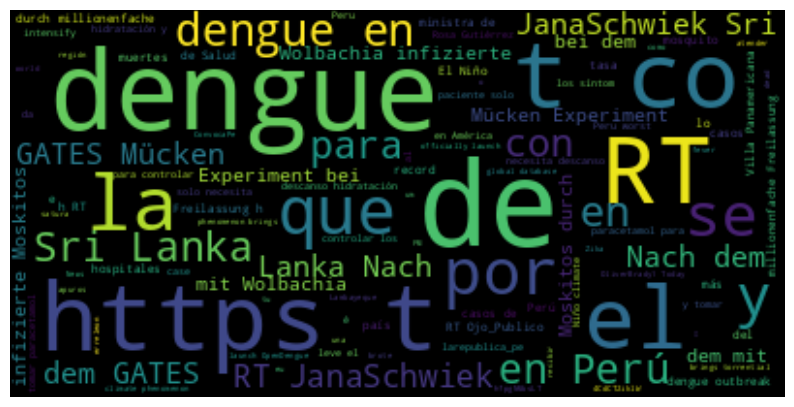

In [21]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
wordcloud

In [23]:
df["mytext_new"] = df['Tweet'].str.lower().str.replace('[^\w\s]','')
 
 
new_df = df.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df.head(10)

<ipython-input-23-60334aef4fae>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["mytext_new"] = df['Tweet'].str.lower().str.replace('[^\w\s]','')


,Word,Frequency
0,de,82
1,dengue,71
2,rt,58
3,el,43
4,en,40
5,a,31
6,la,22
7,y,21
8,dem,18
9,que,18
